In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from progressbar import ProgressBar
import seaborn
from sklearn.metrics.pairwise import cosine_similarity

## Plot Trial-Averaged Responses of All V1 Simple Cells For Natural Movie One Stimulus

In [2]:
data_fpath = '../data/AIBO/VISp/L4/Exc/ExtractedData/NeuralData/dff.h5'

In [3]:
df = pd.read_hdf(data_fpath)

In [4]:
df.head()

,frame,repeat,stimulus,session_type,orientation,spatial_frequency,phase,541483910_540168835,541483918_540168835,541483922_540168835,...,589174806_511510911,589174833_511510911,589175052_511510911,589175071_511510911,589175092_511510911,589175111_511510911,589175127_511510911,589175143_511510911,589175164_511510911,589175188_511510911
0,0.0,0.0,natural_movie_one,three_session_B,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.011620,-0.039642,-0.051788,-0.006390,-0.010864,-0.007202,NaN,-0.032654,0.005600,NaN
1,1.0,0.0,natural_movie_one,three_session_B,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002163,-0.023804,-0.019241,0.006695,-0.003679,-0.005287,NaN,-0.017654,0.000898,NaN
2,2.0,0.0,natural_movie_one,three_session_B,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000771,-0.016495,-0.004166,-0.012474,-0.005272,0.008797,NaN,-0.004723,0.030579,NaN
3,3.0,0.0,natural_movie_one,three_session_B,NaN,NaN,NaN,NaN,NaN,NaN,...,0.008797,-0.029572,-0.025665,-0.001593,0.008774,0.000861,NaN,-0.016144,0.001929,NaN
4,4.0,0.0,natural_movie_one,three_session_B,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.009148,-0.019302,-0.003365,-0.032806,-0.019409,0.002831,NaN,0.000000,-0.001382,NaN


In [5]:
# pull out rows with natural movie one stimulus only
df_nmo = df[df.stimulus == 'natural_movie_one']

In [6]:
# make frame an int now that there are no NaNs
df_nmo = df_nmo.astype({'frame': np.int32})

In [7]:
# trial avg across stimulus frames 
df_nmo_trial_avg = df_nmo.groupby(['frame']).mean()

In [8]:
df_nmo_trial_avg

,repeat,orientation,spatial_frequency,phase,541483910_540168835,541483918_540168835,541483922_540168835,541483926_540168835,541483930_540168835,541483934_540168835,...,589174806_511510911,589174833_511510911,589175052_511510911,589175071_511510911,589175092_511510911,589175111_511510911,589175127_511510911,589175143_511510911,589175164_511510911,589175188_511510911
frame,,,,,,,,,,,,,,,,,,,,,
0,4.5,NaN,NaN,NaN,0.005753,0.003157,-0.014191,-0.007320,-0.009918,-0.003004,...,-0.007599,0.013451,0.045135,0.010201,-0.012077,-0.003428,-0.000393,-0.007404,0.001965,0.000523
1,4.5,NaN,NaN,NaN,-0.003071,0.005768,-0.007996,-0.010368,0.002504,-0.012321,...,-0.002190,-0.001536,0.045044,0.006523,-0.007729,-0.003742,-0.004723,-0.004822,-0.000026,-0.004047
2,4.5,NaN,NaN,NaN,-0.013817,-0.000331,0.002045,0.004025,0.018341,-0.011543,...,0.000603,-0.002920,0.044861,0.001708,-0.009781,0.001002,-0.007469,-0.000317,0.000360,-0.002068
3,4.5,NaN,NaN,NaN,0.026001,0.009880,0.019608,0.012604,0.019501,0.002598,...,0.001472,-0.001719,0.036774,0.006348,-0.006771,-0.003584,-0.005047,-0.005112,-0.003082,-0.007851
4,4.5,NaN,NaN,NaN,0.016800,0.031036,0.037903,0.049927,0.045929,0.027115,...,0.005112,-0.008453,0.036041,-0.003960,-0.005058,-0.003023,0.011024,-0.004795,0.005707,-0.004253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,4.5,NaN,NaN,NaN,0.002378,-0.001539,-0.014923,-0.021774,0.000332,-0.005119,...,-0.005257,0.007343,0.033783,0.001381,-0.002426,-0.001110,-0.008659,-0.003382,0.007420,-0.006165
896,4.5,NaN,NaN,NaN,-0.011757,-0.008385,-0.008522,-0.003052,0.013336,-0.013336,...,0.003237,-0.001424,0.041016,-0.011024,-0.005177,-0.002224,0.004505,-0.007889,0.001828,-0.007973
897,4.5,NaN,NaN,NaN,-0.004608,-0.014709,-0.004776,-0.009270,-0.010719,-0.015305,...,-0.001455,0.001918,0.043945,0.000983,-0.005882,-0.002518,0.006874,-0.002527,-0.004528,-0.004066


In [9]:
# pull out the columns which are not dff 
df_nmo_trial_avg = df_nmo_trial_avg.drop(columns = ['repeat', 'spatial_frequency', 'orientation', 'phase'])

In [10]:
# sort columns by cell ID and rename columns
df_nmo_trial_avg = df_nmo_trial_avg.reindex(sorted(df_nmo_trial_avg.columns, key = lambda col: col.split('_')[0]), axis = 1)
df_nmo_trial_avg = df_nmo_trial_avg.rename(columns = dict(zip(df_nmo_trial_avg.columns, list(range(len(df_nmo_trial_avg.columns))))))

Text(0.5, 86.0, 'Stimulus Frame')

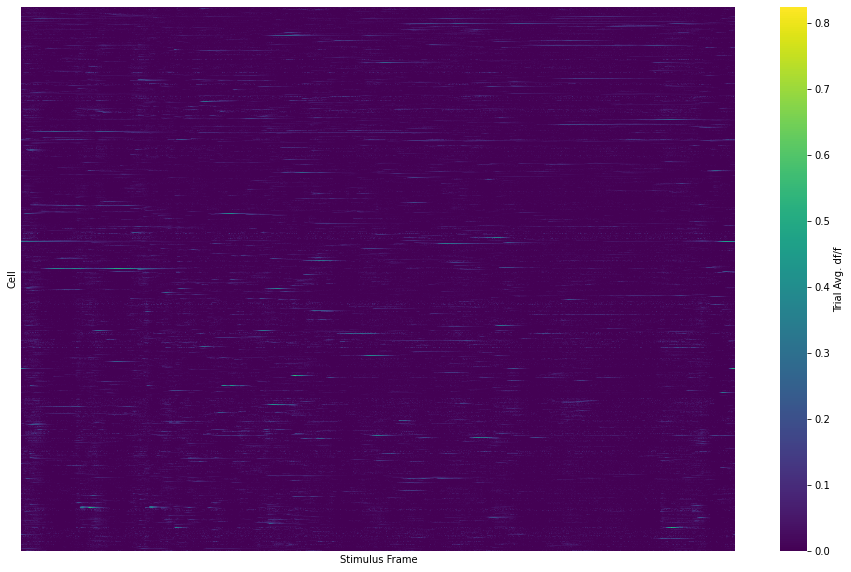

In [11]:
fig = plt.figure(figsize = (16, 10))
seaborn.heatmap(
    data = df_nmo_trial_avg.transpose(),
    cmap = 'viridis',
    vmin = 0.0,
    xticklabels = False,
    yticklabels = False,
    cbar_kws = {'label': 'Trial Avg. df/f'}
)
plt.ylabel('Cell')
plt.xlabel('Stimulus Frame')

## Similarity Matrix for Natural Movie One Stimulus

In [12]:
df_np = df_nmo_trial_avg.to_numpy().transpose()[::4]
print(df_np.shape)

(3107, 900)


<AxesSubplot:>

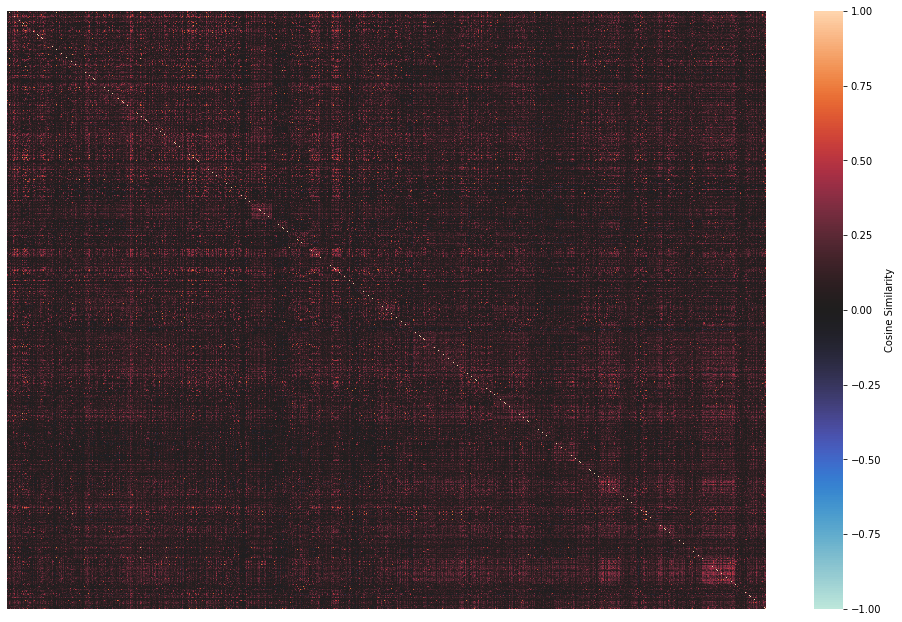

In [13]:
fig = plt.figure(figsize = (17, 11))
seaborn.heatmap(
    data = cosine_similarity(df_np, df_np), 
    cbar_kws = {'label': 'Cosine Similarity'},
    cmap = 'icefire',
    vmin = -1.0,
    vmax = 1.0,
    center = 0.0,
    xticklabels = False,
    yticklabels = False
)

## Plot Responses For Each V1 Simple Cell to Natural Movie One Stimulus Individually

Here, we can plot each cell's responses individually. We take a cell ID from the AIBO database 
and use that to plot the responses of that cell from our extracted .csv file. We can compare to 
the [track plot on the AIBO website](http://observatory.brain-map.org/visualcoding/search/cell?id=517443835#natural_movie_one_a) for that cell to make sure we correctly saved the responses.

In [14]:
cell_id = 517443835
col_name = [col for col in df.columns if col.split('_')[0] == str(cell_id)][0]
print(col_name)

517443835_511510911


In [15]:
# get the appropriate column from the dataframe
df_cell = df[(df.stimulus == 'natural_movie_one') & (df.session_type == 'three_session_A')]
df_cell = df_cell[['frame', col_name]]

In [16]:
df_cell.head()

,frame,517443835_511510911
93127,0.0,0.005379
93128,1.0,0.021042
93129,2.0,0.003607
93130,3.0,-0.000729
93131,4.0,-0.019653


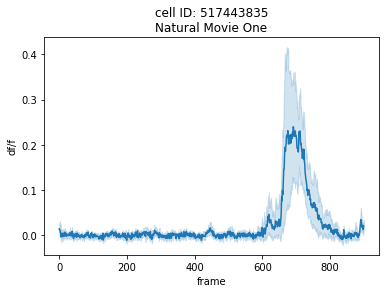

In [17]:
seaborn.lineplot(data = df_cell, x = 'frame', y = col_name)
plt.title('cell ID: {}\nNatural Movie One'.format(col_name.split('_')[0]))
plt.ylabel('df/f')
plt.show()
plt.close()

Plot [another cell's responses](http://observatory.brain-map.org/visualcoding/search/cell?id=675962219#natural_movie_one_a) to the natural movie three stimulus below.

In [31]:
cell_id = 675962219
col_name = [col for col in df.columns if col.split('_')[0] == str(cell_id)][0]
print(col_name)

675962219_661744802


In [32]:
# get the appropriate column from the dataframe
df_cell = df[(df.stimulus == 'natural_movie_three') & (df.session_type == 'three_session_A')]
df_cell = df_cell[['frame', col_name]]

In [33]:
df_cell.head()

,frame,675962219_661744802
102127,0.0,0.079590
102128,1.0,-0.021744
102129,2.0,-0.045593
102130,3.0,-0.053040
102131,4.0,-0.040710


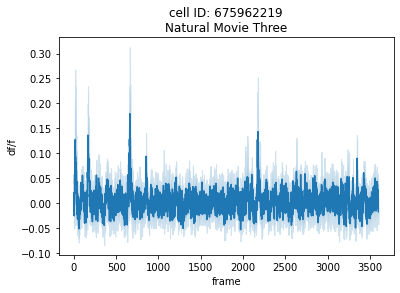

In [34]:
seaborn.lineplot(data = df_cell, x = 'frame', y = col_name)
plt.title('cell ID: {}\nNatural Movie Three'.format(col_name.split('_')[0]))
plt.ylabel('df/f')
plt.show()
plt.close()

[One more cell](http://observatory.brain-map.org/visualcoding/search/cell?id=675961475#natural_movie_one_a) in response to natural movie one.

In [26]:
cell_id = 675961475
col_name = [col for col in df.columns if col.split('_')[0] == str(cell_id)][0]
print(col_name)

675961475_661744802


In [27]:
# get the appropriate column from the dataframe
df_cell = df[(df.stimulus == 'natural_movie_one') & (df.session_type == 'three_session_A')]
df_cell = df_cell[['frame', col_name]]

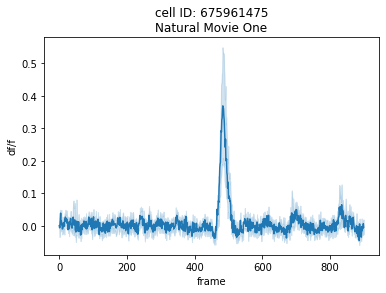

In [28]:
seaborn.lineplot(data = df_cell, x = 'frame', y = col_name)
plt.title('cell ID: {}\nNatural Movie One'.format(col_name.split('_')[0]))
plt.ylabel('df/f')
plt.show()
plt.close()

## Plot Cell Responses to Natural Scenes

[This cell](http://observatory.brain-map.org/visualcoding/search/cell?id=665275808#natural_scene) fired a lot for 
natural scene 105.

In [35]:
cell_id = 665275808
col_name = [col for col in df.columns if col.split('_')[0] == str(cell_id)][0]
print(col_name)

665275808_657082052


In [38]:
# get the appropriate column from the dataframe
df_cell = df[(df.stimulus == 'natural_scenes') & (df.session_type == 'three_session_B')]
df_cell = df_cell[['frame', col_name]]

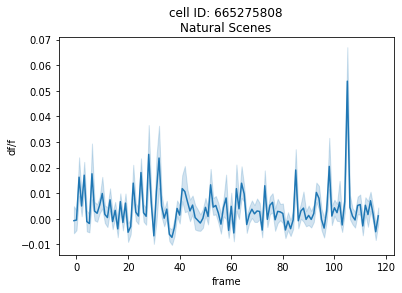

In [39]:
seaborn.lineplot(data = df_cell, x = 'frame', y = col_name)
plt.title('cell ID: {}\nNatural Scenes'.format(col_name.split('_')[0]))
plt.ylabel('df/f')
plt.show()
plt.close()

[This cell](http://observatory.brain-map.org/visualcoding/search/cell?id=517443835#natural_scene) fired a lot for frame 111.

In [40]:
cell_id = 517443835
col_name = [col for col in df.columns if col.split('_')[0] == str(cell_id)][0]
print(col_name)

517443835_511510911


In [41]:
# get the appropriate column from the dataframe
df_cell = df[(df.stimulus == 'natural_scenes') & (df.session_type == 'three_session_B')]
df_cell = df_cell[['frame', col_name]]

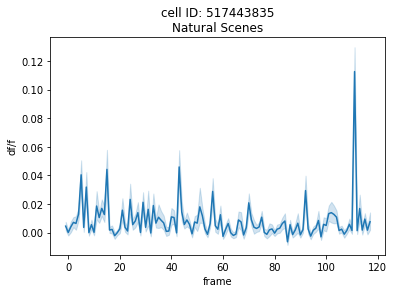

In [43]:
seaborn.lineplot(data = df_cell, x = 'frame', y = col_name)
plt.title('cell ID: {}\nNatural Scenes'.format(col_name.split('_')[0]))
plt.ylabel('df/f')
plt.show()
plt.close()